<a href="https://colab.research.google.com/github/JF11579/Colab/blob/main/Mercy_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https:/colab.to/r

## Libraries

In [6]:
library(tidyverse)
library(ggplot2)
library(lubridate)
install.packages("ggthemes")
library(ggthemes)
install.packages("reshape2") 
library("reshape2") 
#install.packages("corrr")
#library(corrr)
#nstall.packages('polycor')
#library(polycor)
#install.packages(c("AICcmodavg"))
#library(AICcmodavg)




Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘

In [7]:
All_long <- melt(All)
head(All_long , 4)


Using , Race_Ethnicity as id variables



,,Race_Ethnicity,variable,value
,<chr>,<chr>,<fct>,<int>
1,"Median annual earnings, all education levels",White,1995,44130
2,Less than high school completion,White,1995,29680
3,High school completion1,White,1995,37260
4,"Some college, no degree",White,1995,40930


## Options

In [ ]:
options(scipen=999)

options(repr.plot.width=14, repr.plot.height=15)

options(warn=-1)

## Data

## Note

Filter out for one edc level and then regress

Put all income in single column, the Dependent column.  And in the independent columns place race, educatipn level.  WE can do this becasue the dollars are held constant at 2020 levels.

It could be the case that this would benefit from a PAnel Study or time series appraoch:  Are the wage sfrom 2020 truel independent of the wages in 2019 and for that mattter 2018 and all of the preceeding years?  Probably not.  

### Since the dollars are held constat in 2020 we will drop the year for the moment (We will look at the data as a Panel Data later and need the years). We will also drop the rows labled *Median annual earnings, all education levels *there might be some heterona[sdpfgjk[adojf.

In [2]:
All <- read.csv("/content/Mercy_Digest 502.30_race,Edu_Income - Races_Comb.csv" ,check.names = FALSE) 

In [3]:
head(All)

,,Race_Ethnicity,1995,2000,2005,2010,2014,2015,2016,2017,2018,2019,2020
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,"Median annual earnings, all education levels",White,44130,48840,46380,47430,46450,49080,48420,48480,50430,50570,52750
2,Less than high school completion,White,29680,31300,30670,29660,31120,32540,31340,30930,36000,34400,33450
3,High school completion1,White,37260,41450,39650,38600,36020,37750,37730,36950,38560,38940,39730
4,"Some college, no degree",White,40930,44940,42290,41310,38190,38140,38190,41000,39130,40470,41880
5,Associate's degree,White,44170,47680,46370,47090,39960,42200,42800,42220,44040,45050,45000
6,Bachelor's or higher degree,White,57710,61310,59150,58830,57770,59530,59020,59120,61840,60680,63650


In [9]:
str(All)

'data.frame':	32 obs. of  13 variables:
 $               : chr  "Median annual earnings, all\n education levels" "Less than high school completion" "High school completion1" "Some college, no degree" ...
 $ Race_Ethnicity: chr  "White" "White" "White" "White" ...
 $ 1995          : int  44130 29680 37260 40930 44170 57710 54330 67510 35610 23560 ...
 $ 2000          : int  48840 31300 41450 44940 47680 61310 60030 72020 37570 24990 ...
 $ 2005          : int  46380 30670 39650 42290 46370 59150 54250 66210 38310 27010 ...
 $ 2010          : int  47430 29660 38600 41310 47090 58830 54590 64690 37320 24650 ...
 $ 2014          : int  46450 31120 36020 38190 39960 57770 54580 63340 33710 22570 ...
 $ 2015          : int  49080 32540 37750 38140 42200 59530 54550 65520 37730 31560 ...
 $ 2016          : int  48420 31340 37730 38190 42800 59020 53920 65880 36360 23040 ...
 $ 2017          : int  48480 30930 36950 41000 42220 59120 56780 68520 36670 25330 ...
 $ 2018          : int  50430 36

In [4]:
dim(All)

[1] 32 13

In [8]:
All_long <- melt(All)
head(All_long , 4)


Using , Race_Ethnicity as id variables



,,Race_Ethnicity,variable,value
,<chr>,<chr>,<fct>,<int>
1,"Median annual earnings, all education levels",White,1995,44130
2,Less than high school completion,White,1995,29680
3,High school completion1,White,1995,37260
4,"Some college, no degree",White,1995,40930


### Name the first column

In [ ]:
colnames(All_long)[1] <- "Education_Level" 

In [ ]:
head(All_long)

,Education_Level,Race_Ethnicity,variable,value
,<chr>,<chr>,<fct>,<int>
1,"Median annual earnings, all education levels",White,1995,44130
2,Less than high school completion,White,1995,29680
3,High school completion1,White,1995,37260
4,"Some college, no degree",White,1995,40930
5,Associate's degree,White,1995,44170
6,Bachelor's or higher degree,White,1995,57710


### Drop the Year col

In [ ]:
All_long <- All_long%>%  select(Education_Level , Race_Ethnicity ,value)

In [ ]:
head(All_long, 3)

,Education_Level,Race_Ethnicity,value
,<chr>,<chr>,<int>
1,"Median annual earnings, all education levels",White,44130
2,Less than high school completion,White,29680
3,High school completion1,White,37260


## drop that row

## Substitute the text of Category with numbers


In [ ]:
str(All_long)

'data.frame':	352 obs. of  3 variables:
 $ Education_Level: chr  "Medianannualearningsalleducationlevels" "Lessthanhighschoolcompletion" "Highschoolcompletion1" "Somecollegenodegree" ...
 $ Race_Ethnicity : chr  "4" "4" "4" "4" ...
 $ value          : chr  "44130" "29680" "37260" "40930" ...


In [ ]:
# Replace String with Another Stirng on a single column
# df$address[df$address == 'Orange St'] <- 'Portola Pkwy'
#
All_long$Race_Ethnicity[All_long$Race_Ethnicity == 'Asian'] <- '1'
All_long$Race_Ethnicity[All_long$Race_Ethnicity == 'Black'] <- '2'
All_long$Race_Ethnicity[All_long$Race_Ethnicity == 'Hispanic'] <- '3'
All_long$Race_Ethnicity[All_long$Race_Ethnicity == 'White'] <- '4'

In [ ]:
head(All_long)

,Education_Level,Race_Ethnicity,value
,<chr>,<chr>,<chr>
1,Medianannualearningsalleducationlevels,4,44130
2,Lessthanhighschoolcompletion,4,29680
3,Highschoolcompletion1,4,37260
4,Somecollegenodegree,4,40930
5,Associatesdegree,4,44170
6,Bachelorsorhigherdegree,4,57710


# xxxxxx

## Next remove punctuation

In [ ]:
All_long$Education_Level <- gsub("'" , "" , as.character(All_long$Education_Level))

In [ ]:
All_long$Education_Level <- gsub("," , "" , as.character(All_long$Education_Level))

## Next remove the white space

To replace text with words we need to strip out the white space to make the phrase a single "word" then we can replace that word with a number 

In [ ]:
All_long <- as.data.frame(
  apply(All_long,2, function(x) gsub("\\s+", "", x)))

In [ ]:
head(All_long)

,Education_Level,Race_Ethnicity,value
,<chr>,<chr>,<dbl>
1,Medianannualearningsalleducationlevels,4,44130
2,Lessthanhighschoolcompletion,4,29680
3,Highschoolcompletion1,4,37260
4,Somecollegenodegree,4,40930
5,Associatesdegree,4,44170
6,Bachelorsorhigherdegree,4,57710


## Convert Education Level and Race Ethnicity to factors 

In [ ]:
#All_long$Education_Level <-  as.factor(All_long$Education_Level)

#All_long$Race_Ethnicity <- as.factor( All_long$Race_Ethnicity)

In [ ]:
All_long$value <- as.numeric(All_long$value)

LEt us drop all rows containing th avg earnings for all education levels:Medianannualearnings,alleducationlevels

In [ ]:
# df[!grepl("REVERSE", df$Name),]
All_long <- All_long[!grepl("Median", All_long$Education_Level),]

In [ ]:
head(All_long ,10)

,Education_Level,Race_Ethnicity,value
,<chr>,<chr>,<dbl>
2,Lessthanhighschoolcompletion,4,29680
3,Highschoolcompletion1,4,37260
4,Somecollegenodegree,4,40930
5,Associatesdegree,4,44170
6,Bachelorsorhigherdegree,4,57710
7,Bachelorsdegree,4,54330
8,Mastersorhigherdegree,4,67510
10,Lessthanhighschoolcompletion,2,23560
11,Highschoolcompletion1,2,30510


### Now we will get back to substituting number sfor text


In [ ]:

 All_long$Education_Level[All_long$Education_Level == 	'Lessthanhighschoolcompletion'] <- 1
 All_long$Education_Level[All_long$Education_Level == 	'Highschoolcompletion1'] <- 2
 All_long$Education_Level[All_long$Education_Level == 	'Somecollegenodegree'] <- 3
 All_long$Education_Level[All_long$Education_Level == 	'Associatesdegree'] <- 4
 All_long$Education_Level[All_long$Education_Level == 	'Bachelorsdegree'] <- 5
 All_long$Education_Level[All_long$Education_Level == 	'Bachelorsorhigherdegree'] <- 6
All_long$Education_Level[All_long$Education_Level == 	'Mastersorhigherdegree'] <- 6

In [ ]:
head(All_long)

,Education_Level,Race_Ethnicity,value
,<chr>,<chr>,<dbl>
2,1,4,29680
3,2,4,37260
4,3,4,40930
5,4,4,44170
6,6,4,57710
7,5,4,54330


Change character to numeric

In [ ]:
All_long$Education_Level <- as.numeric(All_long$Education_Level)

In [ ]:
All_long$Race_Ethnicity <- as.numeric(All_long$Race_Ethnicity)

In [ ]:
head(All_long ,3)

,Education_Level,Race_Ethnicity,value
,<dbl>,<dbl>,<dbl>
2,1,4,29680
3,2,4,37260
4,3,4,40930


## Before we do any Regressions let us look at  acoorelation matrix

## Let us do a scatter plot where color = race

In [ ]:
All_long$Education_Level <-  as.factor(All_long$Education_Level)

All_long$Race_Ethnicity <- as.factor( All_long$Race_Ethnicity)

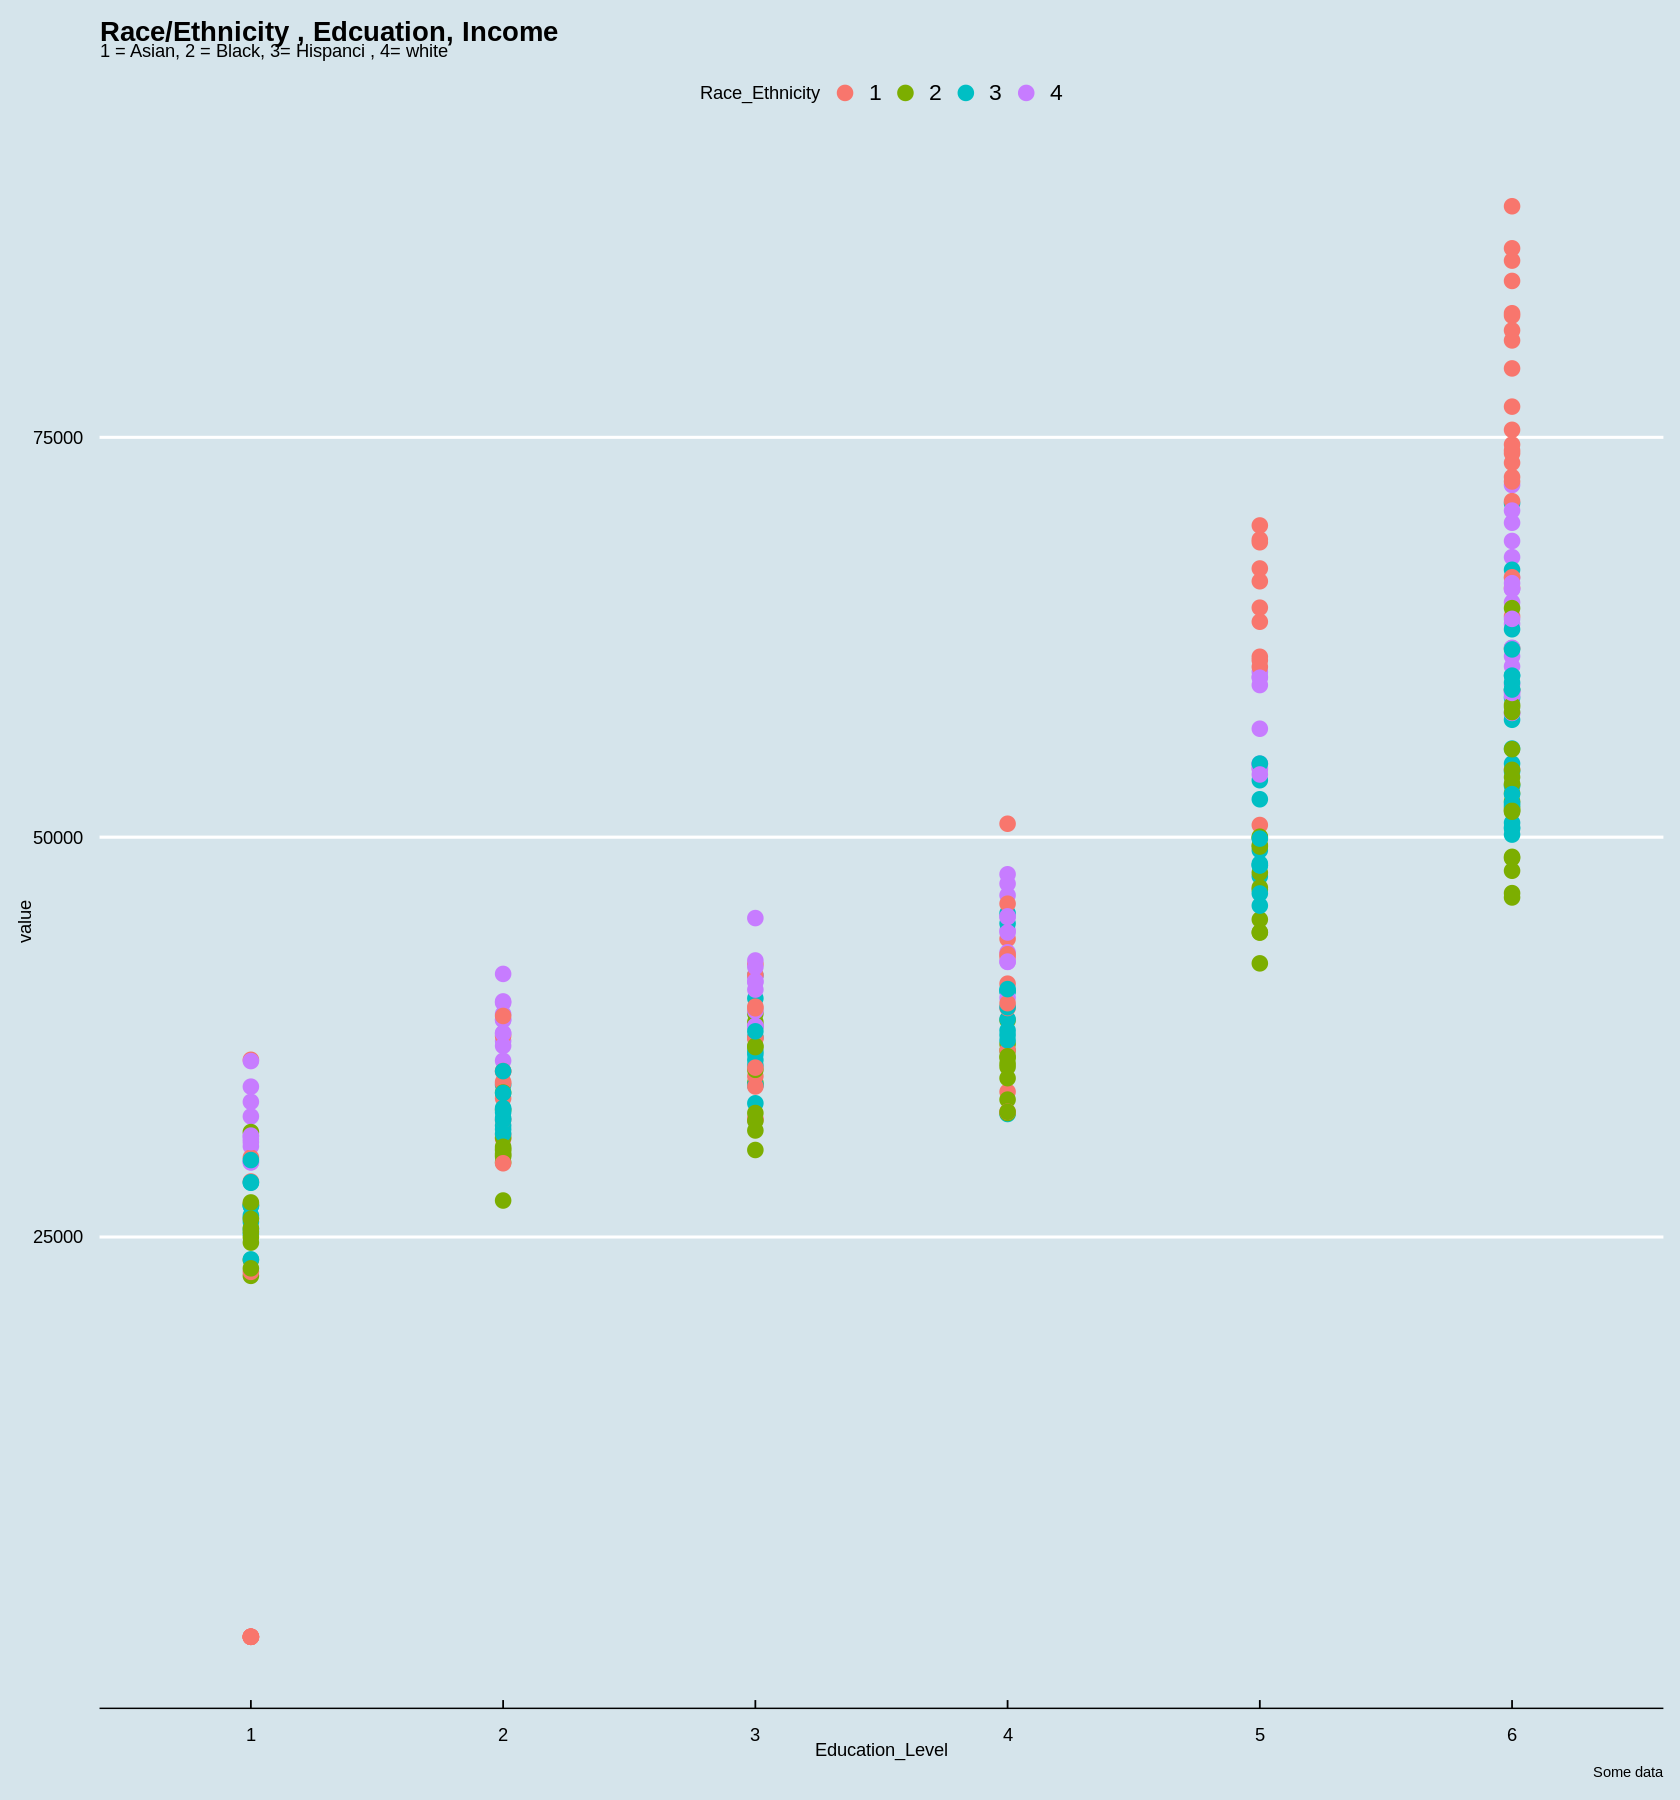

In [ ]:
ggplot(All_long , aes(x= Education_Level, y= value, color = Race_Ethnicity )) +
        geom_point(size = 4) +
        theme_economist()+
        labs(title = "Race/Ethnicity , Edcuation, Income",
              subtitle = "1 = Asian, 2 = Black, 3= Hispanci , 4= white",
              caption = "Some data") +
                scale_y_continuous(breaks=seq(25000,100000,by= 25000))

ERROR: ignored

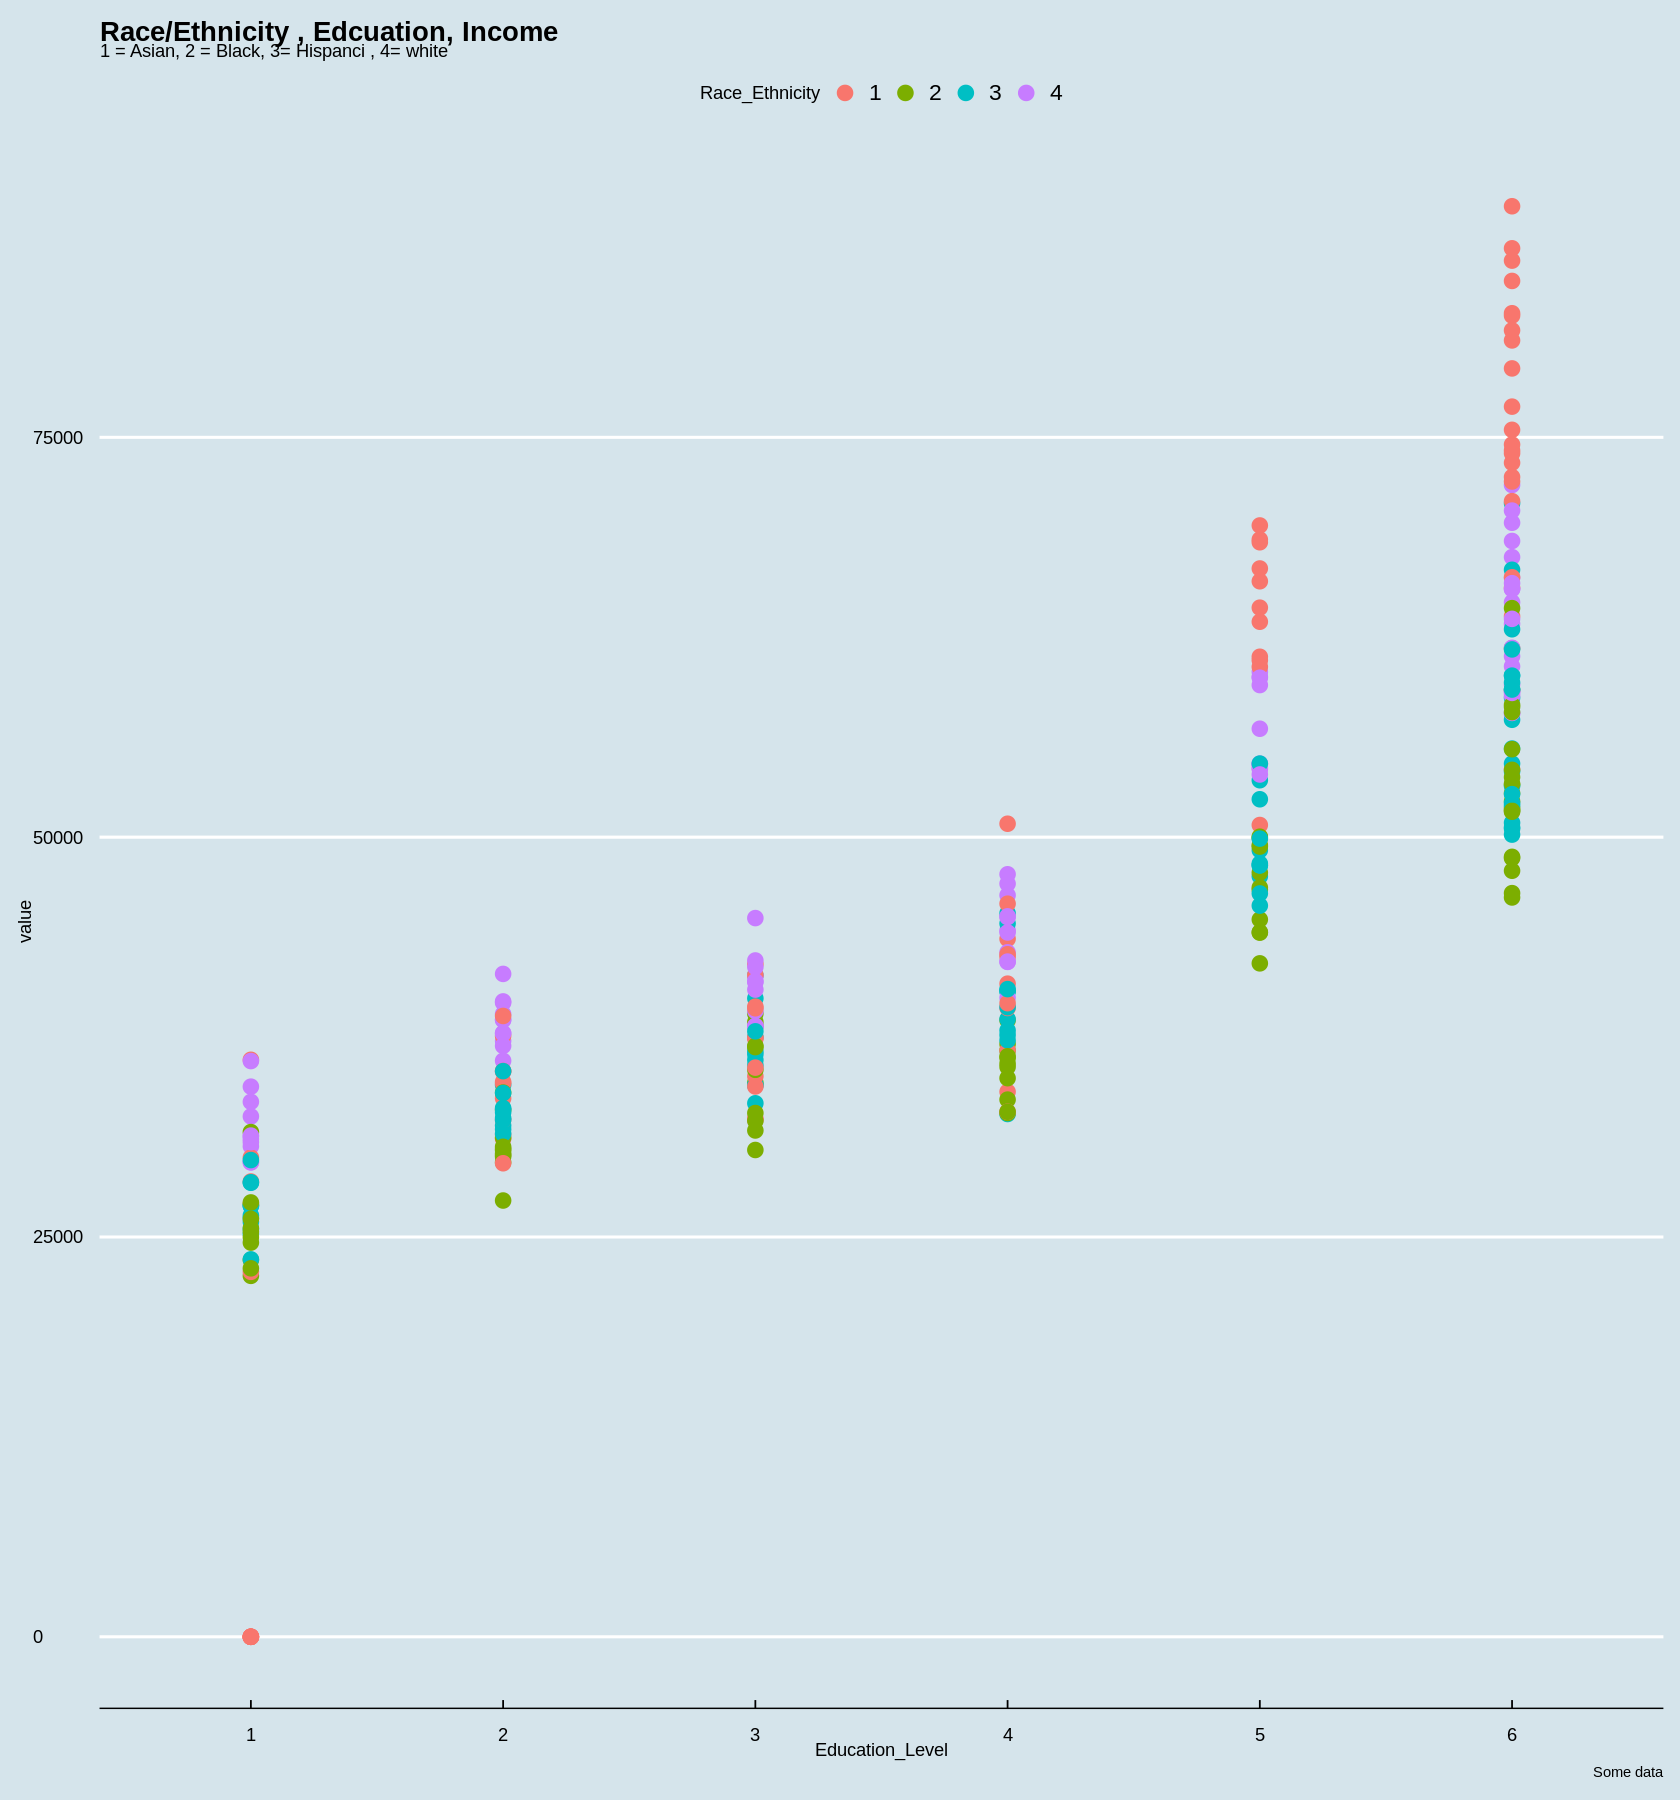

In [ ]:
ggplot(All_long , aes(x= Education_Level, y= value, color = Race_Ethnicity )) +
        geom_point(size = 4) +
        theme_economist()+

        labs(title = "Race/Ethnicity , Edcuation, Income",
              subtitle = "1 = Asian, 2 = Black, 3= Hispanci , 4= white",
              caption = "Some data")
        theme(
  plot.title = element_text(color = "red", size = 12, face = "bold"),
  plot.subtitle = element_text(color = "blue"),
  plot.caption = element_text(color = "green", face = "italic")
) +
   scale_y_continuous(breaks=seq(25000,100000,by= 25000))

## Correlation

In [ ]:
All_long$Education_Level <-  as.factor(All_long$Education_Level)

All_long$Race_Ethnicity <- as.factor( All_long$Race_Ethnicity)

In [ ]:
install.packages('polycor')
library(polycor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Regression

### Simple Linear Regression

In [ ]:
mod <- lm(value ~ Race_Ethnicity + Education_Level ,data = All_long)

In [ ]:
summary(mod)

## Anova

https://www.scribbr.com/statistics/anova-in-r/

In [ ]:
head(All_long,3)

In [ ]:
anova_one_ed <- aov( value ~ Education_Level , data = All_long)
summary(anova_one_ed)

                 Df      Sum Sq     Mean Sq F value              Pr(>F)    
Education_Level   1 56120253173 56120253173   834.1 <0.0000000000000002 ***
Residuals       306 20588256816    67281885                                
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
anova_one_Race <- aov( value ~  Race_Ethnicity, data = All_long)
summary(anova_one_Race )

                Df      Sum Sq   Mean Sq F value Pr(>F)
Race_Ethnicity   1    14813689  14813689   0.059  0.808
Residuals      306 76693696299 250632994               

In [ ]:
anova_two <- aov( value ~ Education_Level  + Race_Ethnicity , data = All_long)
summary(anova_two)

                 Df      Sum Sq     Mean Sq F value              Pr(>F)    
Education_Level   1 56120253173 56120253173  831.98 <0.0000000000000002 ***
Race_Ethnicity    1    14813689    14813689    0.22                0.64    
Residuals       305 20573443126    67453912                                
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#  JUNK BELOW